<a href="https://colab.research.google.com/github/manasc12/RoadMishapRiskAssessment/blob/master/SVM_Implementation_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Implementing Support Vector M. </h1>
<h3> Importing Required Libraries </h3>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load #to save ur model
from sklearn.model_selection import GridSearchCV

<h3> Reading the Data from CSV file </h3>
<h4>1. Accident Data
<br>2. Casualities Data
<br>3. Vehicles Data
<br> We will try to add more and more features this time to build a highly accurate classifier.
<br><h3>Provided:</h3> <h5>Previously we have only used Accident Data to build our classifier without balancing the data and we didn't got a single considerable classifier which can classify most effectively in all of the accident_severity(3,2,1) scenarios.</h5></h4>

In [ ]:
df_Acc=pd.read_csv('/Users/manasc12/MyProjects/Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018.csv')
df_Cas=pd.read_csv('/Users/manasc12/MyProjects/Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Casualties_2018.csv')
df_Veh=pd.read_csv('/Users/manasc12/MyProjects/Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Vehicles_2018.csv')
df_Acc.head(5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [ ]:
df_Cas

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160592,2018984115718,2,1,2,2,59,9,3,0,0,1,0,0,9,3,-1
160593,2018984115918,1,1,3,1,39,7,3,6,9,0,0,0,0,1,3
160594,2018984116018,2,1,2,1,18,4,3,0,0,1,0,0,9,2,-1
160595,2018984116318,1,1,1,1,60,9,2,0,0,0,0,0,2,3,-1


In [ ]:
df_Veh

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226404,2018984116018,1,9,0,9,0,0,0,0,0,...,6,1,67,10,998,1,4,-1,3,-1
226405,2018984116018,2,9,0,15,0,0,1,0,7,...,6,1,24,5,3000,2,21,-1,3,-1
226406,2018984116018,3,9,0,2,6,0,0,0,0,...,6,3,-1,-1,2400,2,5,-1,-1,-1
226407,2018984116318,1,2,0,18,0,1,1,0,0,...,1,1,60,9,49,1,10,-1,3,-1


<h3> Data Cleaning and Wrangling

In [ ]:
#Cleaning up the null valued rows
df_Acc_clnd=df_Acc[~df_Acc.isnull().any(axis=1)]
df_Cas_clnd=df_Cas[~df_Cas.isnull().any(axis=1)]
df_Veh_clnd=df_Veh[~df_Veh.isnull().any(axis=1)]

In [ ]:
#Transforming 'Time' Attribute from hh:mm to only minutes
a= np.array([(int(str(x).split(':')[0])*60+int(str(x).split(':')[1])) for x in df_Acc_clnd['Time'].values])
df_Acc_clnd['Time_Conv']=a

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Visualizing the shape 
print('df_Acc.shape---'+str(df_Acc.shape))
print('df_Cas.shape---'+str(df_Cas.shape))
print('df_Veh.shape---'+str(df_Veh.shape))
print('df_Acc_clnd.shape---'+str(df_Acc_clnd.shape))
print('df_Cas_clnd.shape---'+str(df_Cas_clnd.shape))
print('df_Veh_clnd.shape---'+str(df_Veh_clnd.shape))
print('df_Acc_clnd unique values---')
print(df_Acc_clnd.nunique(axis=0))
print('df_Cas_clnd unique values---')
print(df_Cas_clnd.nunique(axis=0))
print('df_Veh_clnd unique values---')
print(df_Veh_clnd.nunique(axis=0))

df_Acc.shape---(122635, 32)
df_Cas.shape---(160597, 16)
df_Veh.shape---(226409, 23)
df_Acc_clnd.shape---(116181, 33)
df_Cas_clnd.shape---(160597, 16)
df_Veh_clnd.shape---(226409, 23)
df_Acc_clnd unique values---
Accident_Index                                 116181
Location_Easting_OSGR                           79980
Location_Northing_OSGR                          80961
Longitude                                      111657
Latitude                                       110374
Police_Force                                       43
Accident_Severity                                   3
Number_of_Vehicles                                 14
Number_of_Casualties                               17
Date                                              365
Day_of_Week                                         7
Time                                             1438
Local_Authority_(District)                        348
Local_Authority_(Highway)                         175
1st_Road_Class                  

In [ ]:
#and Data Types
print(df_Acc_clnd.dtypes)
print(df_Cas_clnd.dtypes)
print(df_Veh_clnd.dtypes)

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [ ]:
#Dropping some of the irrelevant columns(Features/Attributes)
df_Acc_clnd.drop(['Date','Time','Location_Easting_OSGR','Location_Northing_OSGR'],axis=1,inplace=True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h4>There are 3 sheets(3 dataframes). So lets check which are the columns(attributes/features) on which we can perform our join operation. Inorder to get a single dataframe.

In [ ]:
print('Columns same in Casuality and Vehicle:')
print('-----------------------------------------')
for c1 in df_Cas_clnd.columns:
    for c2 in df_Veh_clnd.columns:
        if(c1==c2):
            print(c1)
print('--------\n--------\n--------')
print('Columns same in Accident and Vehicle:')
print('-----------------------------------------')
for c1 in df_Acc_clnd.columns:
    for c2 in df_Veh_clnd.columns:
        if(c1==c2):
            print(c1)
print('--------\n--------\n--------')
print('Columns same in Accident and Casuality:')
print('-----------------------------------------')
for c1 in df_Acc_clnd.columns:
    for c2 in df_Cas_clnd.columns:
        if(c1==c2):
            print(c1)

Columns same in Casuality and Vehicle:
-----------------------------------------
Accident_Index
Vehicle_Reference
--------
--------
--------
Columns same in Accident and Vehicle:
-----------------------------------------
Accident_Index
--------
--------
--------
Columns same in Accident and Casuality:
-----------------------------------------
Accident_Index


<h4>Now that we know our join keys so lets merge our 3 dataframes

In [ ]:
df_All_clnd=pd.merge(pd.merge(df_Acc_clnd,df_Cas_clnd,how='inner',on='Accident_Index'),df_Veh_clnd,how='inner',on=['Accident_Index','Vehicle_Reference'])

<h4> Bifurcating Attributes for Training and Target

In [ ]:
df=df_All_clnd.reset_index(drop=True)
target_c=['Accident_Severity']
df_train=df.drop(target_c,axis=1)
df_target=df[target_c]

<h4> Balancing/Sampling

Text(0, 0.5, 'No. Of Records')

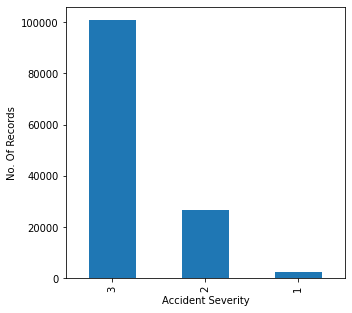

In [ ]:
#Determining Balance of our Data Samples
acc_sev_counts=pd.value_counts(df_target['Accident_Severity'],sort=True)
plt.figure(figsize=(5,5))
acc_sev_counts.plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('No. Of Records')


<h3>As u can see our data set is highly unbalanced w.r.t our output feature.
    <h5><br>1. And probably the reason for which we aren't able to train an effective model in our previous attempts.
    <br>2. But now we will resample our data to balance it and then we will apply our RandomForestClassifier on top of it.
    <br>3. But before applying resampling we would like to do some Label-Encoding as the classifier doesn't accept string data types.

<h4> LabelEncoding

In [ ]:
labelEncodeCols=['LSOA_of_Accident_Location','Local_Authority_(Highway)','Accident_Index']
#labelEncodeCols=['Local_Authority_(Highway)']
Local_Authority_Highway               = LabelEncoder()
LSOA_of_Accident_Location               = LabelEncoder()

Local_Authority_Highway.fit(df_train['Local_Authority_(Highway)'])
LSOA_of_Accident_Location.fit(df_train['LSOA_of_Accident_Location'])

df_train['Local_Authority_(Highway)_E']=Local_Authority_Highway.transform(df_train['Local_Authority_(Highway)'])
df_train['LSOA_of_Accident_Location_E']=LSOA_of_Accident_Location.transform(df_train['LSOA_of_Accident_Location'])
df_train.drop(labelEncodeCols,axis=1,inplace=True)


In [ ]:
#Performing Over Sampling
#There are various sampling technique you can use like;- NearMiss, SMOTETomek, RandomOverSampler
## RandomOverSampler to handle imbalanced data

os =  RandomOverSampler(random_state=42)
df_train_smpl, df_target_smpl = os.fit_sample(df_train, df_target)

Text(0, 0.5, 'No. Of Records')

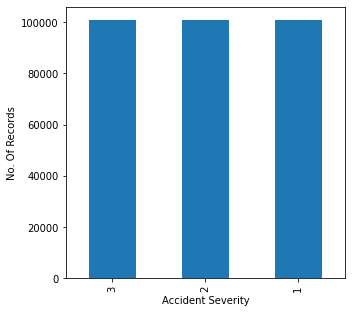

In [ ]:
#Checking the new sampled Data set for balance
acc_sev_counts=pd.value_counts(df_target_smpl['Accident_Severity'],sort=True)
plt.figure(figsize=(5,5))
acc_sev_counts.plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('No. Of Records')


<h3> Splitting up Training and Testing Data Samples

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df_train_smpl,df_target_smpl,test_size=0.7,random_state=42) #Orignal LabelEncod

Text(0, 0.5, 'No. Of Records')

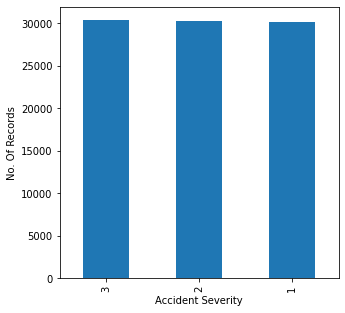

In [ ]:
#Checking the new training Data set after splitting for balance
acc_sev_counts=pd.value_counts(y1_train['Accident_Severity'],sort=True)
plt.figure(figsize=(5,5))
acc_sev_counts.plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('No. Of Records')

In [ ]:
model_svm = svm.SVC(kernel='poly',decision_function_shape='ovr')

In [ ]:
model_svm.fit(x1_train,y1_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='poly')

In [ ]:
y1_pred=model_svm.predict(x1_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.3761761544698584


In [ ]:
metrics.confusion_matrix(y1_test, y1_pred, labels=[3, 2, 1])

array([[49603,  7511, 13469],
       [46394,  9801, 14530],
       [41927,  8502, 20395]])

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_train_smpl)

In [ ]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.82655679e-02 -4.94868704e-02 -1.64854777e-04 ...  3.54593571e-01
  -9.21647293e-02 -4.88671775e-04]
 [-1.29628089e-01 -8.00646361e-04  1.04011180e-01 ... -1.48147938e-02
  -3.98893074e-03  8.48763341e-03]
 [ 2.03571830e-01  6.21508379e-02 -1.40555864e-01 ...  3.61637371e-02
  -3.32438908e-02 -2.99201025e-02]
 ...
 [ 2.09509980e-01 -2.38564767e-01  5.98552742e-02 ... -6.13301356e-02
   1.60179977e-02  1.84111085e-02]
 [ 1.58320947e-01  6.33863251e-02 -5.47997897e-02 ... -8.24448908e-02
   1.64554399e-01  6.70408862e-02]
 [ 2.10397066e-01  6.50312821e-02 -8.56642144e-02 ... -8.38160842e-02
   4.26828178e-02  9.24328914e-03]]

Eigenvalues 
[ 5.07124361e+00  3.95534611e+00  3.13494366e+00  2.92901769e+00
  2.79419068e+00  2.34661417e+00  2.17759179e+00  1.80318449e+00
  1.66072170e+00  1.58350770e+00  1.49175204e+00  1.37217583e+00
  1.33135824e+00  1.28154117e+00  1.25283147e+00  1.94755161e-02
  1.30421144e-02  4.47315297e-02  5.33061999e-02 -6.17453617e-16
  1.0012134

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.0712436065682205
3.955346109107446
3.134943662487753
2.929017691855468
2.7941906781894255
2.346614165283143
2.1775917933018
1.8031844900441238
1.6607216957832882
1.5835076999663042
1.4917520413620216
1.3721758336880963
1.331358242642679
1.2815411657907567
1.2528314688073823
1.192704563123864
1.1492502840426888
1.134148255946525
1.084154624448289
1.0361814341580957
1.024006466491455
1.0123204568550215
0.9971510092333445
0.9868616051871868
0.9450849125761482
0.9201565426607046
0.9185363584785057
0.8884871211476217
0.8573299531253029
0.8451979795429686
0.8323170849855029
0.8072057070422666
0.787896262917658
0.7598505368710056
0.7351347154737611
0.7126690417102657
0.6868452608694
0.6760966333486993
0.6636484700323834
0.6510205796683953
0.6249135969980154
0.5851205641223589
0.5629196759773337
0.504262848690508
0.4769869689190048
0.4435958551267042
0.4240121661314755
0.4096415058797464
0.3880776980769335
0.35970525790854246
0.3501011185314676
0.274841113241

In [ ]:
len(eig_pairs[0][1])

63

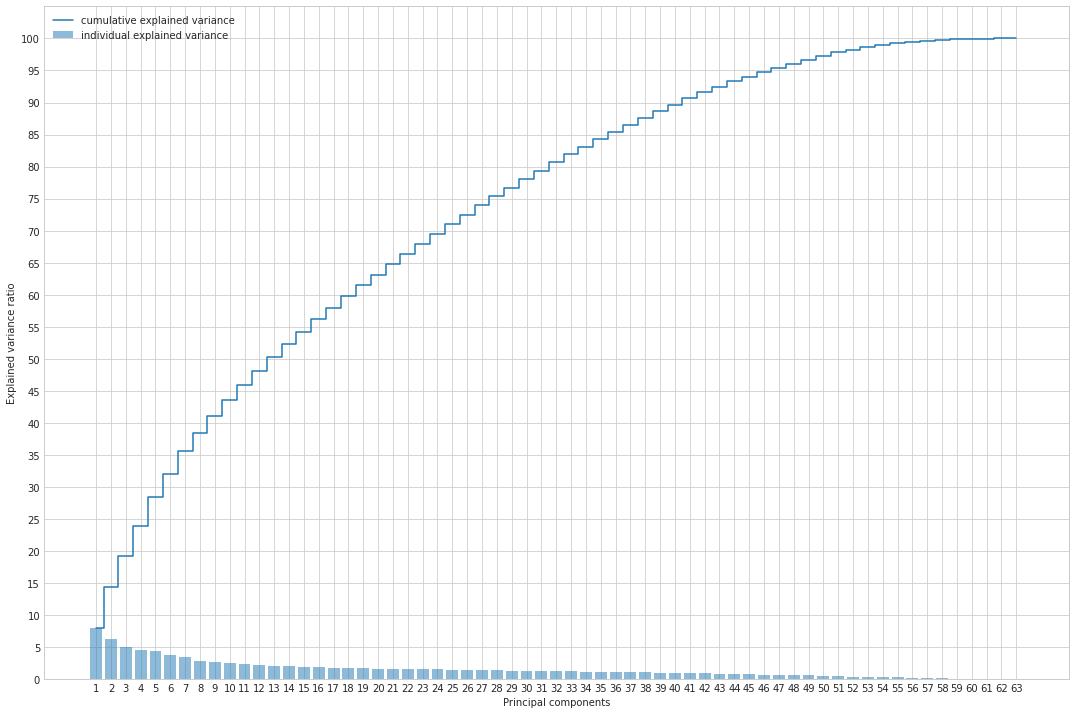

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))

    plt.bar(np.arange(1,len(eig_vals)+1), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(np.arange(1,len(eig_vals)+1), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.yticks(np.arange(0,105,5))
    plt.xticks(np.arange(1,64,1))
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(eig_vals),1),
                     eig_pairs[1][1].reshape(len(eig_vals),1),
                     eig_pairs[2][1].reshape(len(eig_vals),1),
                     eig_pairs[3][1].reshape(len(eig_vals),1),
                     eig_pairs[4][1].reshape(len(eig_vals),1),
                     eig_pairs[5][1].reshape(len(eig_vals),1),
                     eig_pairs[6][1].reshape(len(eig_vals),1),
                     eig_pairs[7][1].reshape(len(eig_vals),1),
                     eig_pairs[8][1].reshape(len(eig_vals),1),
                     eig_pairs[9][1].reshape(len(eig_vals),1),
                     eig_pairs[10][1].reshape(len(eig_vals),1),
                     eig_pairs[11][1].reshape(len(eig_vals),1),
                     eig_pairs[12][1].reshape(len(eig_vals),1),
                     eig_pairs[13][1].reshape(len(eig_vals),1),
                     eig_pairs[14][1].reshape(len(eig_vals),1),
                     eig_pairs[15][1].reshape(len(eig_vals),1),
                     eig_pairs[16][1].reshape(len(eig_vals),1),
                     eig_pairs[17][1].reshape(len(eig_vals),1),
                     eig_pairs[18][1].reshape(len(eig_vals),1),
                     eig_pairs[19][1].reshape(len(eig_vals),1),
                     eig_pairs[20][1].reshape(len(eig_vals),1),
                     eig_pairs[21][1].reshape(len(eig_vals),1),
                     eig_pairs[22][1].reshape(len(eig_vals),1),
                     eig_pairs[23][1].reshape(len(eig_vals),1),
                     eig_pairs[24][1].reshape(len(eig_vals),1),
                     eig_pairs[25][1].reshape(len(eig_vals),1),
                     eig_pairs[26][1].reshape(len(eig_vals),1),
                     eig_pairs[27][1].reshape(len(eig_vals),1),
                     eig_pairs[28][1].reshape(len(eig_vals),1),
                     eig_pairs[29][1].reshape(len(eig_vals),1),
                     eig_pairs[30][1].reshape(len(eig_vals),1),
                     eig_pairs[31][1].reshape(len(eig_vals),1),
                     eig_pairs[32][1].reshape(len(eig_vals),1),
                     eig_pairs[33][1].reshape(len(eig_vals),1),
                     eig_pairs[34][1].reshape(len(eig_vals),1),
                     eig_pairs[35][1].reshape(len(eig_vals),1),
                     eig_pairs[36][1].reshape(len(eig_vals),1),
                     eig_pairs[37][1].reshape(len(eig_vals),1),
                     eig_pairs[38][1].reshape(len(eig_vals),1),
                     eig_pairs[39][1].reshape(len(eig_vals),1)
                    ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 2.82655679e-02 -4.94868704e-02 -1.64854777e-04 ... -4.88671775e-04
  -9.21647293e-02 -2.81571041e-01]
 [-1.29628089e-01 -8.00646361e-04  1.04011180e-01 ...  8.48763341e-03
  -3.98893074e-03  6.83366731e-02]
 [ 2.03571830e-01  6.21508379e-02 -1.40555864e-01 ... -2.99201025e-02
  -3.32438908e-02  5.43980023e-03]
 ...
 [ 2.09509980e-01 -2.38564767e-01  5.98552742e-02 ...  1.84111085e-02
   1.60179977e-02  5.89068266e-02]
 [ 1.58320947e-01  6.33863251e-02 -5.47997897e-02 ...  6.70408862e-02
   1.64554399e-01  4.68302698e-03]
 [ 2.10397066e-01  6.50312821e-02 -8.56642144e-02 ...  9.24328914e-03
   4.26828178e-02  5.28290684e-02]]


In [ ]:
#Prepare the Data with the eigen values u've got
eig_df_train = X_std.dot(matrix_w)

In [ ]:
eig_x1_train, eig_x1_test, eig_y1_train, eig_y1_test = train_test_split(eig_df_train,df_target_smpl,test_size=0.7,random_state=42) #Orignal LabelEncod

In [ ]:
model_svm_pca = svm.SVC(kernel='poly',decision_function_shape='ovr')

In [ ]:
model_svm_pca.fit(eig_x1_train,eig_y1_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='poly')

In [ ]:
eig_y1_pred=model_svm_pca.predict(eig_x1_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(eig_y1_test, eig_y1_pred))

Accuracy: 0.893834970678634


In [ ]:
metrics.confusion_matrix(eig_y1_test, eig_y1_pred, labels=[3, 2, 1])

array([[66627,  3104,   852],
       [10806, 55665,  4254],
       [ 1565,  1940, 67319]])

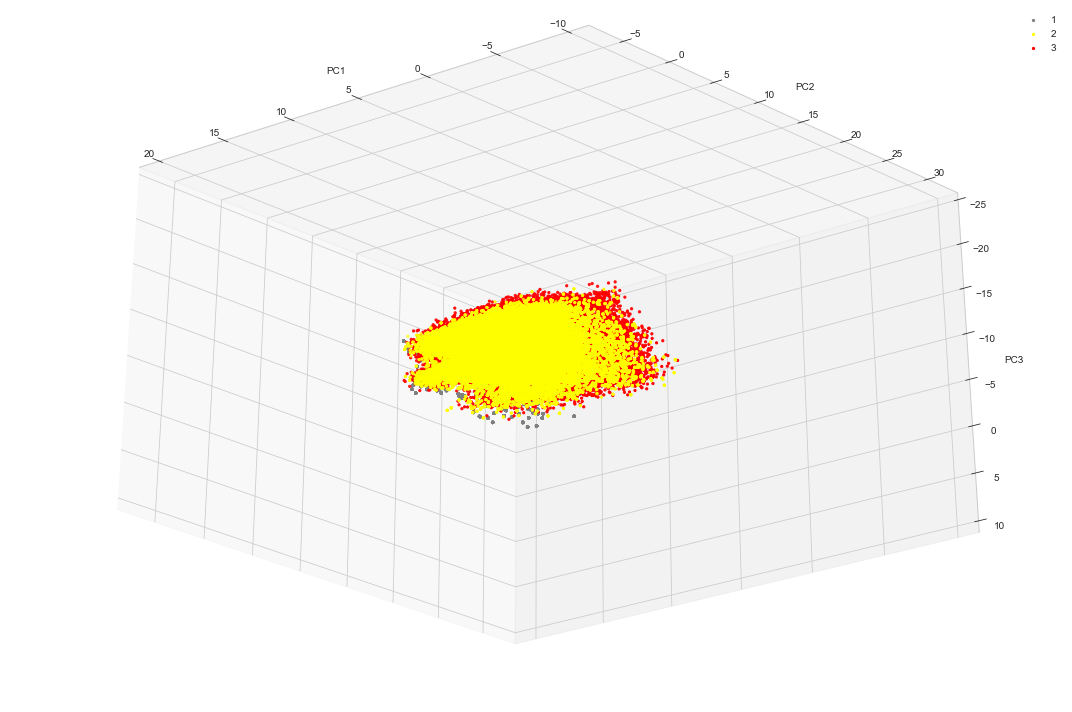

In [ ]:
#https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

from mpl_toolkits.mplot3d import Axes3D

with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(15, 10))
    ax=fig.add_subplot(111, projection='3d')
    for lab, col, si in zip((1, 2, 3),
                        ('grey', 'yellow', 'red'),
                        (5,5,5)):
        ax.scatter(eig_df_train[df_target_smpl.values.reshape(len(df_target_smpl))==lab,0],eig_df_train[df_target_smpl.values.reshape(len(df_target_smpl))==lab,1], eig_df_train[df_target_smpl.values.reshape(len(df_target_smpl))==lab,2] ,label=lab, c=col, s=si)
        ax.view_init(150, 50)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    


<h2>Referrences
<h4>1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 (For Hyperparameter Tuning and RandomForest Classifier)
<br>2. https://github.com/krishnaik06/Handle-Imbalanced-Dataset (For Handling Imbalanced Data Sets)
<br>3. https://jinchuika.com/post/1-preprocessing-part-1/ (For LabelEncoding)
<br>4. https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e (For Feature Selection)